# Analiza Animejev

**Anime** je ime za Japonsko filmsko in televizijsko animacijo. Danes kot anime označimo bistveno več, namreč današnjemu animeju ni treba biti več niti iz Japonske (imamo že nekaj Ameriških animejev) niti ni potrebno, da je v povezavi s televizijo (kar nekaj je namreč animejev dostopnih zgolj na internetu t.i. ONA).

Spekter animejev je torej precej širok, zato jih je pametno ločevati na kategorije:
* TV: anime predvajan po Japonski televiziji
* Movie: daljši (približno uro in pol) anime, ki je načeloma celota (ni v več delih)
* ONA: anime, objavljen najprej po internetu (preden je predvajan drugje - ponavadi nikoli ni)
* OVA: anime, izdan najprej v fizični obliki (kasete, cd,...)
* Music: načeloma kratka animacija k neki glasbi
* Special: dodatek k nekemu drugemu animeju

Seveda je še kar nekaj pomembnih stvari o tem kako so animeji izdelani in predvajani, a bom namenoma zaenkrat o tem molčal ter se bom k tem vrnil spotoma. Sedaj pa kar začnimo analizirati!

In [1]:
import pandas as pd

anime = pd.read_csv('data/anime.csv', index_col='id')
pd.options.display.max_rows = 10

In [2]:
anime

,title,score,airedfrom,airedto,episodes,type,status,source,rating,members,duration,rank,popularity,favorites,description
id,,,,,,,,,,,,,,,
1,Cowboy Bebop,8.81,1998-04-03 00:00:00,1999-04-24 00:00:00,26.0,TV,Finished Airing,Original,R - 17+ (violence &amp; profanity),758864,24 min. per ep.,27,38,41714,"In the year 2071, humanity has colonized sever..."
5,Cowboy Bebop: Tengoku no Tobira,8.41,2001-09-01 00:00:00,NaN,1.0,Movie,Finished Airing,Original,R - 17+ (violence &amp; profanity),190962,1 hr. 55 min.,158,445,753,"Another day, another bounty—such is the life o..."
6,Trigun,8.30,1998-04-01 00:00:00,1998-09-30 00:00:00,26.0,TV,Finished Airing,Manga,PG-13 - Teens 13 or older,395512,24 min. per ep.,248,143,10187,"Vash the Stampede is the man with a $$60,000,0..."
7,Witch Hunter Robin,7.33,2002-07-02 00:00:00,2002-12-24 00:00:00,26.0,TV,Finished Airing,Original,PG-13 - Teens 13 or older,77661,25 min. per ep.,2346,1142,531,Witches are individuals with special powers li...
8,Bouken Ou Beet,7.03,2004-09-30 00:00:00,2005-09-29 00:00:00,52.0,TV,Finished Airing,Manga,PG - Children,11546,23 min. per ep.,3500,3640,14,It is the dark century and the people are suff...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38435,Yao Shen Ji 3rd Season,7.44,2018-10-01 00:00:00,NaN,40.0,ONA,Currently Airing,Novel,PG-13 - Teens 13 or older,384,7 min. per ep.,2109,10448,4,The third Season of Yao Shen Ji.
38446,Larva Island,4.50,2018-10-19 00:00:00,NaN,13.0,ONA,Finished Airing,Original,G - All Ages,23,8 min. per ep.,11454,14766,0,The 4th season of Larva. Stranded on a tropica...
38451,Reizouko no Tsukenosuke!,5.50,2018-10-01 00:00:00,NaN,NaN,TV,Currently Airing,Original,G - All Ages,20,1 min.,12252,14777,0,A gag anime about foods in a refrigerator. The...


Zgoraj so lepo vidni zajeti podatki. Kaj so, je zelo na grobo opisano v README. Kar bi nas lahko skrbelo je, da je *duration* raje kot s številko predstavljen z besedo (npr. "24 min. per ep."). To se zdi neugodno za obdelovanje, a pravzaprav obstajajo standardi za tipe animejev, ki se jih v ogromni večini držijo (npr. TV - 24min, Movie - 1h 30min), zato obdelovanje po dolžini epizode niti ni smiselno. Prav tako se zdi kot, da nimamo kaj delati z *describtion*-om. To je res.

Uporabniki na MyAnimeList (**MAL**) lahko ocenjujejo animeje, ter označijo, da so jih pogledali. Na tak način dobimo *score* in *members* respektivno. A kaj je *rank*? Pa poglejmo kaj ima MAL povedati o tem:

__Weighted Rank (WR) = (v / (v + m)) * S + (m / (v + m)) * C__
* S = Average score for the Anime (mean).
* v = Number of votes for the Anime = (Number of people scoring the Anime).
* m = Minimum votes/scores required to get a calculated score (currently 50 scores required).
* C = The mean score across the entire Anime DB.

Pri dovolj popularnih animejih (tj. **1 << v**) je **m << v** in zato je **WR ~ S**, kot potrdi naslednji graf:

In [3]:
popularni_animeji = anime[anime['members'] > 10000]
popularni_animeji.shape  # preverimo, da je 'popularnih' animejev dovolj, da so reprezentativni

(3686, 15)

In [4]:
popularni_animeji.plot.scatter(x='score', y='rank')

Graf v resnici prikazuje *rank*, ne *WR*. Rank je namreč uvrstitev animejev glede na izračunan WR, tako je sedaj tudi lažje razumeti, da graf ne pada linearno - to je posledica neenakomerne porazdelitve ocen (večina se giba okrog povprečne).

Prej sem omenil, da je popularnost merjena z *members*. Porodi se seveda vprašanje: kaj je potem *popularity*? Na spletni strani sicer tega podatka nisem našel, a se zdi skoraj očitno, da je to uvrstitev animejev glede na *members*. In res:

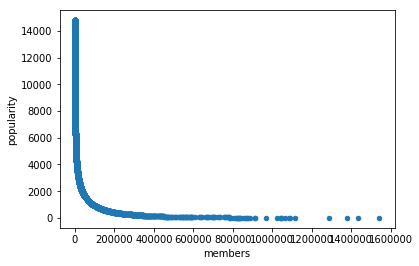

In [5]:
anime.plot.scatter(x='members', y='popularity')

Ker imamo torej več podatkov, ki povejo isto stvar je nekaj stolpcev nepotrebnih. Obdržali bomo *score* in *members*.

In [6]:
anime = anime.drop(['rank', 'popularity'], axis=1)

Ko smo že pri odstranjevanju, bi se lahko uprašali kako točno se *favorites* razlikuje od *score*. Na MAL obstaja možnost označiti anime kot "favorite", da poudariš, da ti je bil posebno všeč. Zdi se kot, da mora favorites naraščati z oceno.

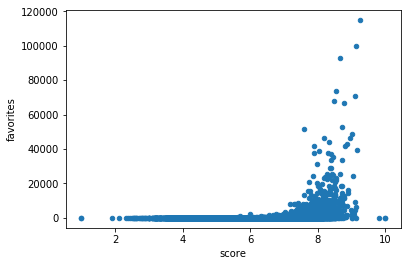

In [7]:
anime.plot.scatter(x='score', y='favorites')

A kot vidite to ni čisto res. Sam sem "favoritiziral" več animejev, ki sem jih ocenil z 9, kot tistih z 10. Tako da *favorites* ni čisto isto kot *score* in v nadaljevanju bomo gledali kako je povezan z drugimi podatki (ko bo to seveda smiselno).

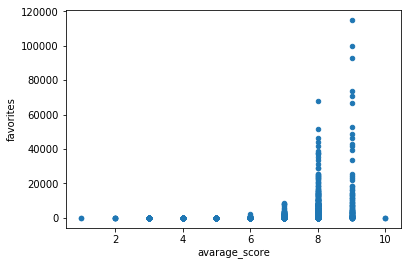

In [8]:
anime['avarage_score'] = round(anime['score'])
anime.plot.scatter(x='avarage_score', y='favorites')

In [7]:
anime.score.mean()

6.410049261083744

In [9]:
anime[anime['source'] == 'Game'].score.mean()

6.410049261083744

In [54]:
anime.groupby('rating').count()

,title,score,airedfrom,airedto,episodes,type,status,source,members,duration,rank,popularity,favorites,description
rating,,,,,,,,,,,,,,
G - All Ages,4608,4608,3357,1190,4468,4608,4608,4608,4608,4608,4608,4608,4608,4608
None,360,360,304,124,343,360,360,360,360,360,360,360,360,359
PG - Children,1275,1275,1188,546,1235,1275,1275,1275,1275,1275,1275,1275,1275,1275
PG-13 - Teens 13 or older,5036,5036,4868,2829,4989,5036,5036,5036,5036,5036,5036,5036,5036,5036
R - 17+ (violence &amp; profanity),989,989,971,596,987,989,989,989,989,989,989,989,989,989
R+ - Mild Nudity,847,847,795,498,845,847,847,847,847,847,847,847,847,847


In [11]:
anime.groupby('rating').score.mean()

rating
G - All Ages                          5.769572
None                                  5.866167
PG - Children                         6.231718
PG-13 - Teens 13 or older             6.788485
R - 17+ (violence &amp; profanity)    6.963468
R+ - Mild Nudity                      6.387674
Name: score, dtype: float64

In [14]:
anime.groupby('type').score.mean()

type
Movie      6.268972
Music      5.309559
ONA        5.671906
OVA        6.339894
Special    6.382952
TV         6.755218
Name: score, dtype: float64